In [ ]:
#import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#assign a varaible and read the data
df = pd.read_csv('/content/retail.csv', encoding='latin1')

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


The dataset has 541909 rows and 8 columns. 5 columns have categorical variables while 3 has numerical variables. Our columns of interest are **Quantity**, **Stockcode** and **InvoiceNo**. The summary statistics is provivded above.

In [ ]:
#finding the missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
#drop missing values in Description
df.dropna(subset=['Description','CustomerID'], inplace=True)

In [ ]:
#identify duplicates values
df[df.duplicated()].value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate       UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER       1         6/5/2011 11:37    2.95       16923.0     United Kingdom    19
           22697      GREEN REGENCY TEACUP AND SAUCER      1         6/5/2011 11:37    2.95       16923.0     United Kingdom    11
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        10/26/2011 12:46  1.25       14102.0     United Kingdom     7
538514     21756      BATH BUILDING BLOCK WORD             1         12/12/2010 14:27  5.95       15044.0     United Kingdom     5
578289     23395      BELLE JARDINIERE CUSHION COVER       1         11/23/2011 14:07  3.75       17841.0     United Kingdom     5
                                                                                                                                ..
556481     23182      TOILET SIGN OCCUPIED OR VACANT       3         6/12/2011 13:00   0.83       16115.0     United Kingdom     1
556473     22727      ALARM CLOCK BAKELIKE RED             1         6/12/2011 12:00   3.75       17265.0     United Kingdom     1
           21069      VINTAGE BILLBOARD TEA MUG            1         6/12/2011 12:00   1.25       17265.0     United Kingdom     1
           21067      VINTAGE RED TEATIME MUG              1         6/12/2011 12:00   1.25       17265.0     United Kingdom     1
556484     85053      FRENCH ENAMEL CANDLEHOLDER           1         6/12/2011 13:17   2.10       16938.0     United Kingdom     1
Name: count, Length: 4837, dtype: int64

In [ ]:
#find the duplicates
df.duplicated().sum()

np.int64(5225)

In [ ]:
#drop the duplicates
df.drop_duplicates(inplace=True)

In [ ]:
#identify categorical varaible
df.select_dtypes(include=['object']).columns

Index(['InvoiceNo', 'StockCode', 'Description', 'InvoiceDate', 'Country'], dtype='object')

In [ ]:
#find unique country
df['Country'].unique()

list(df['Country'].unique())

['United Kingdom',
 'France',
 'Australia',
 'Netherlands',
 'Germany',
 'Norway',
 'EIRE',
 'Switzerland',
 'Spain',
 'Poland',
 'Portugal',
 'Italy',
 'Belgium',
 'Lithuania',
 'Japan',
 'Iceland',
 'Channel Islands',
 'Denmark',
 'Cyprus',
 'Sweden',
 'Austria',
 'Israel',
 'Finland',
 'Greece',
 'Singapore',
 'Lebanon',
 'United Arab Emirates',
 'Saudi Arabia',
 'Czech Republic',
 'Canada',
 'Unspecified',
 'Brazil',
 'USA',
 'European Community',
 'Bahrain',
 'Malta',
 'RSA']

In [ ]:
#find the number of countries
df['Country'].nunique()

37

In [ ]:
#find the frequency of every Country
df['Country'].value_counts()

,count
Country,
United Kingdom,356728
Germany,9480
France,8475
EIRE,7475
Spain,2528
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1471


In [ ]:
#identify InvoiceNo with C
Cancelled = df[df['InvoiceNo'].str.contains('C')]
Cancelled

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
Cancelled.describe()

,Quantity,UnitPrice,CustomerID
count,8872.000000,8872.000000,8872.000000
mean,-30.774910,18.899512,14990.152953
std,1172.249902,445.190864,1708.230387
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13505.000000
50%,-2.000000,2.950000,14868.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


In [ ]:
Cancelled.shape

(8872, 8)

In [ ]:
#check the percentage of C
Cancelled_percentage = Cancelled.shape[0] / df.shape[0] * 100
print(f"{Cancelled_percentage:.2f}%")

2.21%


In [ ]:
#find unique stockcode
df['StockCode'].nunique()

3684

In [ ]:
#find unique stockcode
df['StockCode'].unique()

array(['85123A', '71053', '84406B', ..., '90214Z', '90089', '23843'],
      dtype=object)

In [ ]:
#find the stockcode with highest quantity
df.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
StockCode,
84077,53119
22197,48689
85099B,44963
84879,35215
85123A,34185
21212,33386
23084,27045
22492,25880
22616,25305


In [ ]:
#stockcode with highest frequecy
df['StockCode'].value_counts().head(10)

,count
StockCode,
85123A,2065
22423,1894
85099B,1659
47566,1409
84879,1405
20725,1346
22720,1224
POST,1196
22197,1110


In [ ]:
#find highest stockcode in df
df['StockCode'].mode()

,StockCode
0,85123A


In [ ]:
# Outputting the characters that are represented in stockcode
df['StockCode'].str[0].unique()

array(['8', '7', '2', '4', '1', 'P', '3', 'D', '9', 'C', '5', 'M', '6',
       'B'], dtype=object)

In [ ]:
#finding the character on Stockcode
df['StockCode'].str[0].nunique()

14

In [ ]:
df.groupby('StockCode').sum().sort_values('Quantity',ascending=False).head()

,InvoiceNo,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
StockCode,,,,,,,
84077,5366155366185368305368395368565370505371295374...,WORLD WAR 2 GLIDERS ASSTD DESIGNSWORLD WAR 2 G...,53119,12/2/2010 10:0912/2/2010 10:1712/2/2010 17:381...,139.30,7285096.0,United KingdomUnited KingdomUnited KingdomUnit...
22197,5363905364045364095364125364645364645365205365...,SMALL POPCORN HOLDERSMALL POPCORN HOLDERSMALL ...,48689,12/1/2010 10:1912/1/2010 11:2912/1/2010 11:451...,930.11,17151375.0,United KingdomUnited KingdomUnited KingdomUnit...
85099B,5363865363905364095364645365225365265365425365...,JUMBO BAG RED RETROSPOTJUMBO BAG RED RETROSPOT...,44963,12/1/2010 9:5712/1/2010 10:1912/1/2010 11:4512...,3339.80,25348589.0,United KingdomUnited KingdomUnited KingdomUnit...
84879,5363675363925363955364085364605364645365025365...,ASSORTED COLOUR BIRD ORNAMENTASSORTED COLOUR B...,35215,12/1/2010 8:3412/1/2010 10:2912/1/2010 10:4712...,2361.49,21400078.0,United KingdomUnited KingdomUnited KingdomUnit...
85123A,5363655363735363755363905363945363965364015364...,WHITE HANGING HEART T-LIGHT HOLDERWHITE HANGIN...,34185,12/1/2010 8:2612/1/2010 9:0212/1/2010 9:3212/1...,5969.97,32133017.0,United KingdomUnited KingdomUnited KingdomUnit...


In [ ]:
# display top 10 stockcode in df
top_10_stockcodes = df['StockCode'].value_counts(normalize=True).head(10)*100

print(top_10_stockcodes)

StockCode
85123A    0.514188
22423     0.471609
85099B    0.413093
47566     0.350843
84879     0.349847
20725     0.335156
22720     0.304778
POST      0.297806
22197     0.276392
23203     0.275894
Name: proportion, dtype: float64


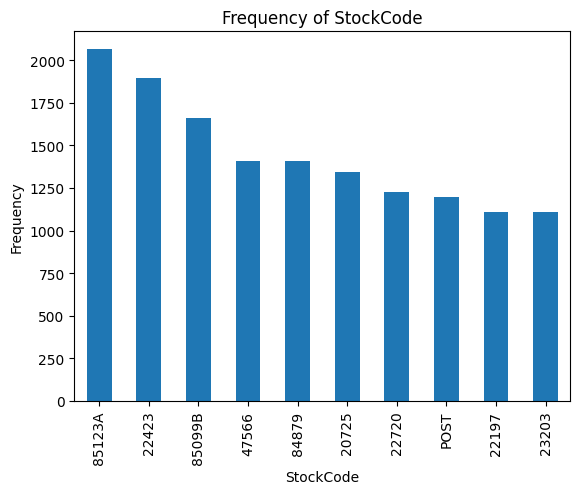

In [ ]:
#find unique in stockCode
df['StockCode'].value_counts().head(10).plot(kind='bar')
plt.xlabel('StockCode')
plt.ylabel('Frequency')
plt.title('Frequency of StockCode')
plt.show()

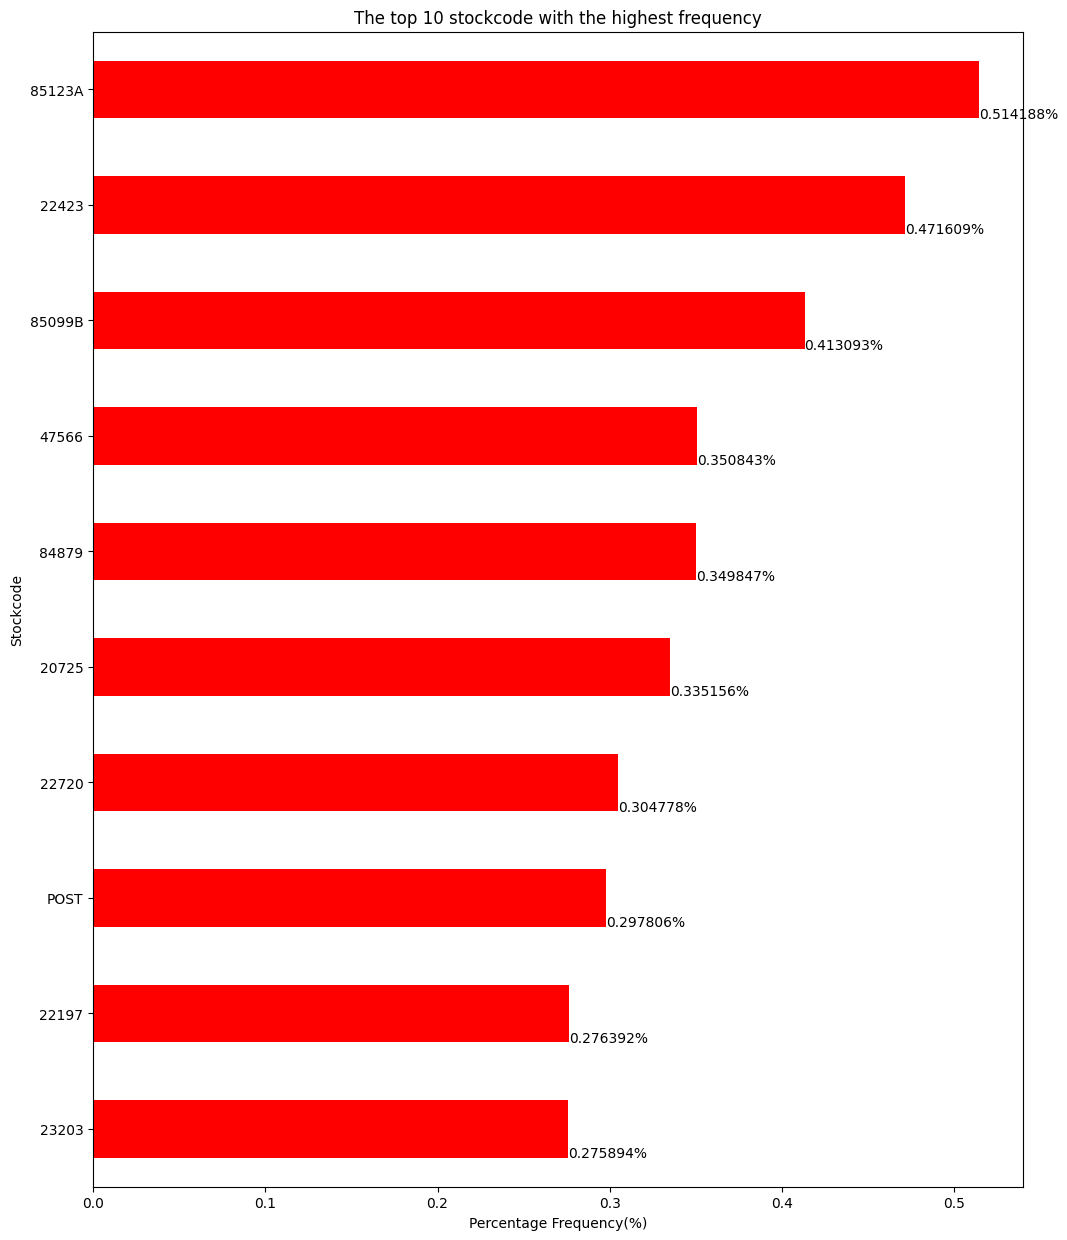

In [ ]:
# top 10 stockcodes
top_10_stockcodes = df['StockCode'].value_counts(normalize=True).head(10)*100
top_10_stockcodes


# plot the top 10 stockcode with the highest frequency
plt.figure(figsize=(12,15))
top_10_stockcodes.plot(kind='barh', color='red')
plt.title('The top 10 stockcode with the highest frequency')
plt.xlabel('Percentage Frequency(%)')
plt.ylabel('Stockcode')
plt.gca().invert_yaxis()


# frequencies of the graph
for index, value in enumerate(top_10_stockcodes):
  plt.text(value, index+0.25, f'{value:2f}%', fontsize = 10)
plt.show()

In [ ]:
#checking for anormaly in the stockcode
df['StockCode'].str[0].unique()

#check count
df['StockCode'].str[0].value_counts()

,count
StockCode,
2,330873
8,44096
4,8597
1,5304
7,5214
3,3590
9,1482
P,1200
M,460


In [ ]:
#display the description culomn
df['Description'].loc[:1000]


,Description
0,WHITE HANGING HEART T-LIGHT HOLDER
1,WHITE METAL LANTERN
2,CREAM CUPID HEARTS COAT HANGER
3,KNITTED UNION FLAG HOT WATER BOTTLE
4,RED WOOLLY HOTTIE WHITE HEART.
...,...
996,SKULLS SQUARE TISSUE BOX
997,PINK PAISLEY SQUARE TISSUE BOX
998,PACK OF 6 HANDBAG GIFT BOXES
999,TOAST ITS - HAPPY BIRTHDAY


In [ ]:
#top 10 stockcode for description
df['Description'].value_counts(normalize=True).head(10)*100

,proportion
Description,
WHITE HANGING HEART T-LIGHT HOLDER,0.512445
REGENCY CAKESTAND 3 TIER,0.471609
JUMBO BAG RED RETROSPOT,0.413093
PARTY BUNTING,0.350843
ASSORTED COLOUR BIRD ORNAMENT,0.349847
LUNCH BAG RED RETROSPOT,0.334907
SET OF 3 CAKE TINS PANTRY DESIGN,0.304778
POSTAGE,0.297806
LUNCH BAG BLACK SKULL.,0.273653


In [ ]:
#output bank charges in stockcode
df[df['StockCode'].str.contains('bank charges')]

#print output

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#list the description column that contains postage/anormaly
df[df['Description'].str.contains('POSTAGE')]

#drop
df = df[~df['Description'].str.contains('POSTAGE')]

In [ ]:
low_case = df['Description'].unique()
low_case

array(['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN',
       'CREAM CUPID HEARTS COAT HANGER', ...,
       'PINK CRYSTAL SKULL PHONE CHARM',
       'CREAM HANGING HEART T-LIGHT HOLDER',
       'PAPER CRAFT , LITTLE BIRDIE'], dtype=object)

In [ ]:
len(low_case)

3894

In [ ]:
low_case = [desc for desc in low_case if any (char.islower() for char in desc)]
low_case

['Discount',
 'BAG 500g SWIRLY MARBLES',
 'POLYESTER FILLER PAD 45x45cm',
 'POLYESTER FILLER PAD 45x30cm',
 'POLYESTER FILLER PAD 40x40cm',
 'FRENCH BLUE METAL DOOR SIGN No',
 'Manual',
 'BAG 250g SWIRLY MARBLES',
 'BAG 125g SWIRLY MARBLES',
 '3 TRADITIONAl BISCUIT CUTTERS  SET',
 'Bank Charges',
 'NUMBER TILE COTTAGE GARDEN No',
 'FOLK ART GREETING CARD,pack/12',
 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE',
 'POLYESTER FILLER PAD 65CMx65CM',
 'NUMBER TILE VINTAGE FONT No ',
 'POLYESTER FILLER PAD 30CMx30CM',
 'POLYESTER FILLER PAD 60x40cm',
 'FLOWERS HANDBAG blue and orange',
 'Next Day Carriage',
 'THE KING GIFT BAG 25x24x12cm',
 'CRUK Commission',
 'High Resolution Image']

In [ ]:
#drop High Resolution Image
df = df[~df['Description'].isin(low_case)]
print (low_case)

['Discount', 'BAG 500g SWIRLY MARBLES', 'POLYESTER FILLER PAD 45x45cm', 'POLYESTER FILLER PAD 45x30cm', 'POLYESTER FILLER PAD 40x40cm', 'FRENCH BLUE METAL DOOR SIGN No', 'Manual', 'BAG 250g SWIRLY MARBLES', 'BAG 125g SWIRLY MARBLES', '3 TRADITIONAl BISCUIT CUTTERS  SET', 'Bank Charges', 'NUMBER TILE COTTAGE GARDEN No', 'FOLK ART GREETING CARD,pack/12', 'ESSENTIAL BALM 3.5g TIN IN ENVELOPE', 'POLYESTER FILLER PAD 65CMx65CM', 'NUMBER TILE VINTAGE FONT No ', 'POLYESTER FILLER PAD 30CMx30CM', 'POLYESTER FILLER PAD 60x40cm', 'FLOWERS HANDBAG blue and orange', 'Next Day Carriage', 'THE KING GIFT BAG 25x24x12cm', 'CRUK Commission', 'High Resolution Image']


In [ ]:
# drop high resolution image and next day carriage
df.drop(df[df['Description'] == 'High Resolution Image'].index, inplace=True)
df.drop(df[df['Description'] == 'Next Day Carriage'].index, inplace=True)
df

<ipython-input-109-9e977aa90a2a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['Description'] == 'High Resolution Image'].index, inplace=True)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#assign variable to the above
UK = df[df['Country']=='United Kingdom']

In [ ]:
UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
#find the highest purchase of stockcode in UK
UK.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
StockCode,
84077,47886
22197,45194
85099B,40777
84879,32580
85123A,32136
22616,24297
17003,22672
21212,22182
22178,21427


In [ ]:
#find the most ocurring stockcode
UK['StockCode'].mode()

,StockCode
0,85123A


In [ ]:
#display the row for the stockcode
UK[UK['StockCode']=='85123A']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:02,2.55,17850.0,United Kingdom
66,536375,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 9:32,2.55,17850.0,United Kingdom
220,536390,85123A,WHITE HANGING HEART T-LIGHT HOLDER,64,12/1/2010 10:19,2.55,17511.0,United Kingdom
262,536394,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/1/2010 10:39,2.55,13408.0,United Kingdom
...,...,...,...,...,...,...,...,...
538708,581412,85123A,CREAM HANGING HEART T-LIGHT HOLDER,4,12/8/2011 14:38,2.95,14415.0,United Kingdom
539083,581432,85123A,CREAM HANGING HEART T-LIGHT HOLDER,32,12/8/2011 15:51,2.55,13798.0,United Kingdom
539979,581452,85123A,WHITE HANGING HEART T-LIGHT HOLDER,32,12/8/2011 18:03,2.55,17675.0,United Kingdom
540217,581472,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/8/2011 19:55,2.95,15796.0,United Kingdom


In [ ]:
#find anormaly in country
df[df['Country'].str.contains('Unspecified')]

#drop
df = df[~df['Country'].str.contains('Unspecified')]

In [ ]:
import plotly.graph_objects as go
from tabulate import tabulate
plt.figure

<function matplotlib.pyplot.figure(num: 'int | str | Figure | SubFigure | None' = None, figsize: 'tuple[float, float] | None' = None, dpi: 'float | None' = None, *, facecolor: 'ColorType | None' = None, edgecolor: 'ColorType | None' = None, frameon: 'bool' = True, FigureClass: 'type[Figure]' = <class 'matplotlib.figure.Figure'>, clear: 'bool' = False, **kwargs) -> 'Figure'>

In [ ]:
df['CustomerID'].nunique()

4358

In [ ]:
#relationship between stockcode and CustomerId
df.groupby('StockCode')['CustomerID'].nunique().sort_values(ascending=False).head(10)

,CustomerID
StockCode,
22423,885
85123A,858
47566,708
84879,677
22720,640
85099B,636
21212,635
22086,615
22457,590


<Axes: xlabel='StockCode'>

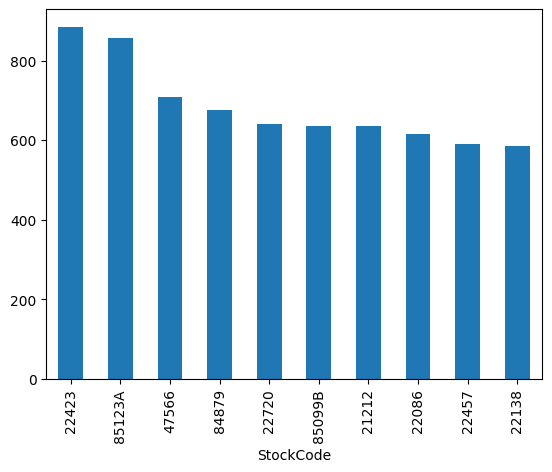

In [ ]:
#check top 10
df.groupby('StockCode')['CustomerID'].nunique().sort_values(ascending=False).head(10).plot(kind='bar')

In [ ]:
#find anormaly in invoiceno
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540448,C581490,22178,VICTORIAN GLASS HANGING T-LIGHT,-12,12/9/2011 9:57,1.95,14397.0,United Kingdom
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [ ]:
#feature engineer of InvoiceDate
#df["invoicedate"] = pd.to_datetime(df["InvoiceDate"])

# extract month
#df["invoicemonth"] = df["invoicedate"].dt.month

#print output
#df.head()

In [ ]:
#output unitprice column equal to zero in df
df[df['UnitPrice']==0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
#find unique stockcode
uni_stock = df['StockCode'].unique()

#then the code can follow
outlier_stockcode = [code for code in uni_stock if sum (c.isdigit() for c in str(code)) in (0,1)]
print(outlier_stockcode)
for code in outlier_stockcode:
  print(code)

['C2', 'PADS']
C2
PADS


In [ ]:
#remove all anormaly present in entire dataset
df = df[~df['StockCode'].isin(outlier_stockcode)]

In [ ]:
#create a new column Transaction Status
df['Transaction Status'] = df['InvoiceNo'].apply(lambda x: 'Cancelled' if 'C' in x else 'Completed')
df

<ipython-input-125-9a96299805c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Transaction Status'] = df['InvoiceNo'].apply(lambda x: 'Cancelled' if 'C' in x else 'Completed')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction Status
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Completed
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Completed
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Completed
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,Completed
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,Completed
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,Completed
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,Completed


In [ ]:
#visualize the transaction status
df['Transaction Status'].value_counts()

,count
Transaction Status,
Completed,389592
Cancelled,8482


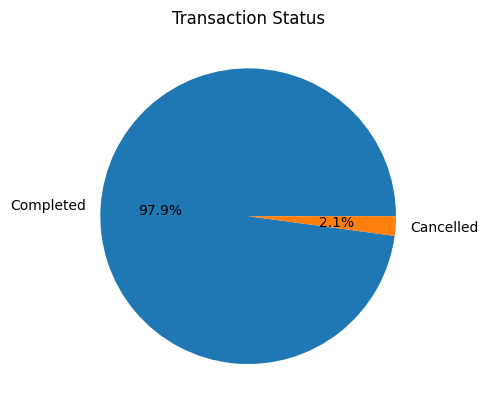

In [ ]:
#plot pie chart for transaction status
plt.pie(df['Transaction Status'].value_counts(), labels=df['Transaction Status'].value_counts().index, autopct='%1.1f%%')
plt.title('Transaction Status')
plt.show()

From the visualization, more than 90% of the transaction  was completed.

In [ ]:
#output transaction done in RSA
RSA = df[df['Country']=='RSA']
RSA

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Transaction Status
395472,571035,21238,RED RETROSPOT CUP,8,10/13/2011 12:50,0.85,12446.0,RSA,Completed
395473,571035,21243,PINK POLKADOT PLATE,8,10/13/2011 12:50,1.69,12446.0,RSA,Completed
395474,571035,23240,SET OF 4 KNICK KNACK TINS DOILY,6,10/13/2011 12:50,4.15,12446.0,RSA,Completed
395475,571035,23209,LUNCH BAG VINTAGE DOILY,10,10/13/2011 12:50,1.65,12446.0,RSA,Completed
395476,571035,23201,JUMBO BAG ALPHABET,10,10/13/2011 12:50,2.08,12446.0,RSA,Completed
395477,571035,23205,CHARLOTTE BAG VINTAGE ALPHABET,10,10/13/2011 12:50,0.85,12446.0,RSA,Completed
395478,571035,21936,RED RETROSPOT PICNIC BAG,5,10/13/2011 12:50,2.95,12446.0,RSA,Completed
395479,571035,22620,4 TRADITIONAL SPINNING TOPS,12,10/13/2011 12:50,1.45,12446.0,RSA,Completed
395480,571035,22619,SET OF 6 SOLDIER SKITTLES,4,10/13/2011 12:50,3.75,12446.0,RSA,Completed
395481,571035,21889,WOODEN BOX OF DOMINOES,12,10/13/2011 12:50,1.25,12446.0,RSA,Completed


In [ ]:
#highest item in RSA
RSA['StockCode'].value_counts().head(10)

,count
StockCode,
21238,1
21243,1
23240,1
23209,1
23201,1
23205,1
21936,1
22620,1
22619,1


In [ ]:
#highest quantiity purchased
RSA.groupby('StockCode')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
StockCode,
21889,12
22585,12
84375,12
22915,12
22620,12
22384,10
22411,10
20725,10
22478,10


In [ ]:
#CustomerId with highest purchase
RSA.groupby('CustomerID')['Quantity'].sum().sort_values(ascending=False).head(10)

,Quantity
CustomerID,
12446.0,351
